In [50]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.data.transforms import get_image_files
import PIL
import torch
import numpy as np
import os 

In [57]:
DATA_PATH = 'clean'
DATA_PATH_X = 'clean/x-data'
DATA_PATH_Y = 'clean/y-data'
CODES_PATH = "clean/codes.txt"
BATCH_SIZE = 4
IMG_SIZE = (128)

In [100]:
path_x = "clean/x-data/"
path_y = "clean/y-data/"
x_files = get_image_files(path_x)
y_files = get_image_files(path_y)
x_files[0]
y_files[0]

Path('clean/y-data/0.png')

In [52]:
img = PIL.Image.open(x_files[0])
# img

In [154]:
def open_image(fname, size=IMG_SIZE):
    img = PIL.Image.open(fname).convert('RGB')
    img = img.resize((size, size))
    gray_img = PIL.ImageOps.grayscale(img)
    t = torch.Tensor(np.array(gray_img))
    # t = t[None, :].float()/255.0
    # return t.permute(2,0,1).float()/255.0
    return t

In [114]:
open_image(x_files[0])

torch.Size([1, 224, 224])


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.3412, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.8078, 0.4118, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.2980, 0.7882, 0.0039]]])

In [55]:
def label_func(fname):
    path_y = "clean/y-data/"
    base_name_y = os.path.basename(fname)
    fname_y = os.path.join(path_y, base_name_y)
    return open_image(fname_y)

In [56]:
label_func(x_files[0]).shape

torch.Size([1, 224, 224])

In [59]:
dls = ImageDataLoaders.from_folder(
                                        path_x, label_func, valid_pct=0.2,
                                        seed=11, bs=BATCH_SIZE, 
                                        batch_tfms=[*aug_transforms(size=IMG_SIZE), 
                                        Normalize.from_stats(*imagenet_stats)])

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [65]:
dls = ImageDataLoaders.from_folder(
                                        path_x, x_files, label_func, valid_pct=0.2,
                                        seed=11, bs=BATCH_SIZE)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


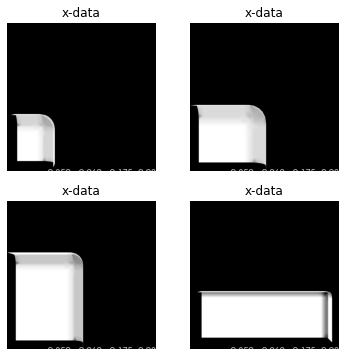

In [67]:
dls.show_batch()

In [127]:
dblock = DataBlock(
    blocks=(ImageBlock, ImageBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_image_files('y-data'),
    get_x=get_image_files('x-data'),
    item_tfms=Resize((128, 128)))

In [ ]:
dls = ImageDataLoaders.from_df()

In [68]:
x_files

(#858) [Path('clean/x-data/0.png'),Path('clean/x-data/1.png'),Path('clean/x-data/1008.png'),Path('clean/x-data/1028.png'),Path('clean/x-data/1045.png'),Path('clean/x-data/1049.png'),Path('clean/x-data/1065.png'),Path('clean/x-data/1073.png'),Path('clean/x-data/1087.png'),Path('clean/x-data/1101.png')...]

In [105]:
path_data = 'clean\data'
x_files[0]

Path('clean/x-data/0.png')

In [159]:
dblock = DataBlock(
    blocks=(ImageBlock, ImageBlock),
    get_items=get_image_files,
    get_x = open_image,
    get_y = label_func,
    )

In [147]:
dsets = dblock.datasets(path_x)

TypeError: Cannot handle this data type: (1, 1, 224), <f4

In [123]:
dsets[0]

torch.Size([224, 224])


(PILImage mode=RGB size=588x588, PILImage mode=F size=224x224)

In [166]:
dls = dblock.dataloaders(
                    path_x, valid_pct=0.2, seed=11, bs=BATCH_SIZE, 
                    batch_tfms=[ 
                    Normalize.from_stats(*imagenet_stats)]
                    )

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


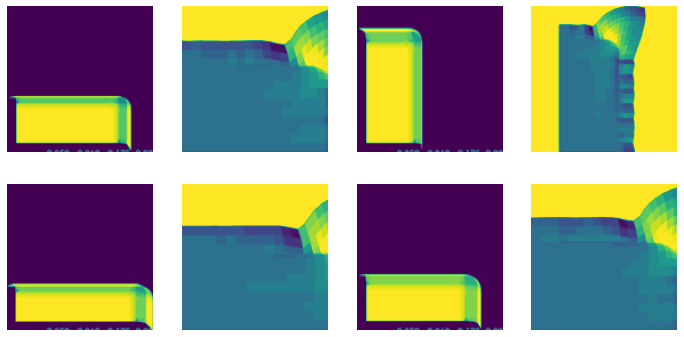

In [167]:
dls.show_batch()

In [102]:
# import shutil
# import regex as re
# for x_file in x_files:
#     base_name = os.path.basename(x_file)
#     new_name = f'x_{base_name}'
#     new_path = os.path.join(path_data, new_name)
#     old_path = os.path.join(path_x, base_name)
#     shutil.copy(old_path, new_path)

# for y_file in y_files:
#     base_name = os.path.basename(y_file)
#     new_name = f'y_{base_name}'
#     new_path = os.path.join(path_data, new_name)
#     shutil.copy(y_file, new_path)    